### A Notebook to convert LDR images to HDR images

In [21]:
import cv2
from PIL import Image
import numpy as np
from numpy import interp
import matplotlib.pyplot as plt

In [22]:
# Read in the image file 

img = cv2.imread('images/LDR.png', 1)

In [23]:
#How many elements are in that data. 
print(img.size)

#What is the shape of the array.
print(img.shape)

#What type are the elements.
print(img.dtype)

#What are the pixel values
print(img[0,0])

399834
(291, 458, 3)
uint8
[213 182 151]


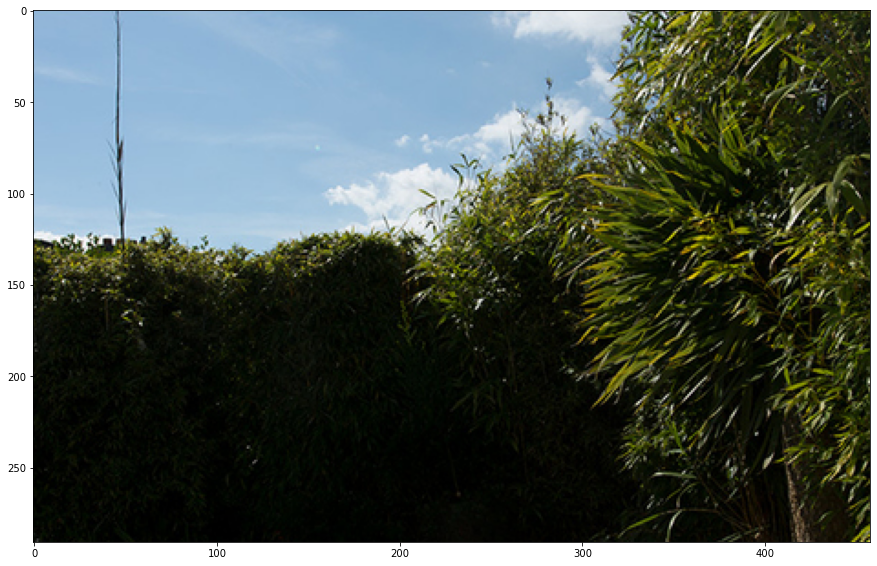

In [24]:
# Draw the image.  Convert from BGR to RGB. 

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize = (15,30))
plt.imshow(img)

In [25]:
# Multiply Function

def multiply(img):

    # Save the width, height, and channel depth of the image. 
    h = img.shape[0]
    w = img.shape[1]
    d = img.shape[2]

    # Convert image to a float between 0 and 1.
    img = img.astype("float64") / 255

    # Apply the Filter

    # For each pixel row in the image. 
    for y in range(0,h):
        # For each pixel in the row. x = pixel
        for x in range(0,w):
            # For each RGB value.
            for z in range(0,d):
                # Apply Multiply blend
                img[y,x,z] = img[y,x,z] * img[y,x,z]

    # Convert back to an integer between 0 and 255.
    img = img * 255
    img = np.uint8(img)
    
    # Return Multiply blended image
    return img

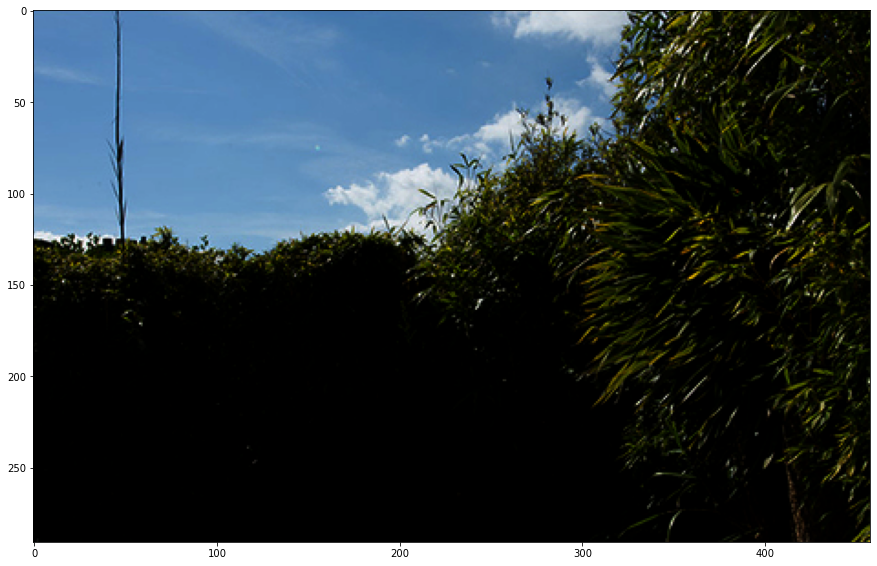

In [26]:
# Multiply the image data to bring back highlight information 

dark = multiply(img)
fig = plt.figure(figsize = (15,30))
plt.imshow(dark)

In [27]:
# Screen Function

def screen(img):

    # Save the width, height, and channel depth of the image. 
    h = img.shape[0]
    w = img.shape[1]
    d = img.shape[2]

    # Convert image to a float between 0 and 1.
    img = img.astype("float64") / 255

    # Apply the Filter

    # For each pixel row in the image. 
    for y in range(0,h):
        # For each pixel in the row. x = pixel
        for x in range(0,w):
            # For each RGB value.
            for z in range(0,d):
                # Apply Screen blend 
                img[y,x,z] = 1 - (1 - img[y,x,z]) * (1 - img[y,x,z])

     # Convert back to an integer between 0 and 255.
    img = img * 255
    img = np.uint8(img)

    # Return Screen blended image
    return img

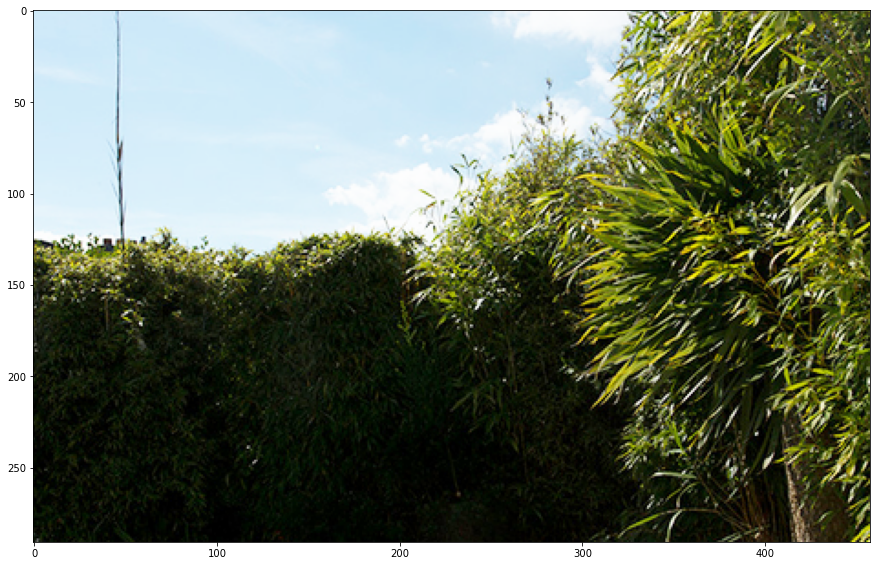

In [28]:
# Screen the image data to bring back shadow information.

light = screen(img)
fig = plt.figure(figsize = (15,30))
plt.imshow(light)

In [29]:
# Blend Screen and Multiply together

def blendImg(img, blendMult, blendScreen):

    # Save the width, height, and channel depth of the image. 
    h = img.shape[0]
    w = img.shape[1]
    d = img.shape[2]

    # Convert images to a float between 0 and 1.
    img = img.astype("float64") / 255
    blendMult = blendMult.astype("float64") / 255
    blendScreen = blendScreen.astype("float64") / 255
    
    # Create a variable for the blended image and set it to the original image. 
    imgBlend = img


     # Apply the Filter

    # For each pixel row in the image. 
    for y in range(0,h):
        # For each pixel in the row. x = pixel
        for x in range(0,w):
            # For each RGB value.
            for z in range(0,d):

                # Preceived brightness 
                brightness = (img[y,x,0] * 0.2126) + (img[y,x,1] * 0.7152) + (img[y,x,2] * 0.0722)
                
                # Set a high and low cut off for the multiply (cuttOffHigh) and screen (cuttOffLow) images. 
                cutOffHigh = 2/3
                cutOffLow = 1/3
                
                if(brightness > cutOffHigh):

                    # Calculate an alpha mask so the blending fades out the closer you get to the midtone values.
                    alpha = np.interp(brightness,[cutOffHigh,1],[0,1])

                    # Blend the mulitplied image
                    imgBlend[y,x,z] = (img[y,x,z] * (1-alpha)) + (blendMult[y,x,z] * (alpha))
                if(brightness < cutOffLow):

                    # Calculate an alpha mask so the blending fades out the closer you get to the midtone values.
                    alpha = np.interp(brightness,[0,cutOffLow],[1,0])

                    #  Blend the screened image
                    imgBlend[y,x,z] = (img[y,x,z] * (1-alpha)) + (blendScreen[y,x,z] * (alpha))
                
    # Convert back to an integer between 0 and 255.
    imgBlend = imgBlend * 255
    imgBlend = np.uint8(imgBlend)

    # Return the blended image. 
    return imgBlend

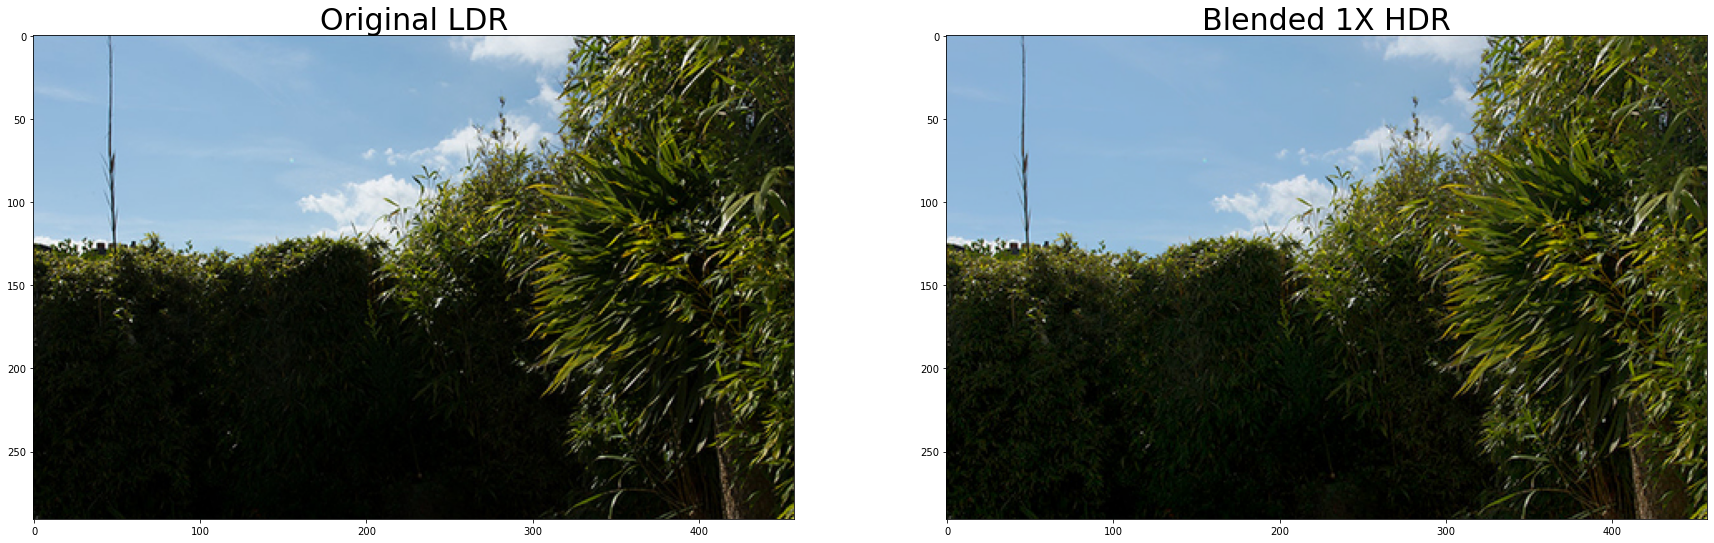

In [30]:
# Create the muliply and screen images
img1 = multiply(img)
img2 = screen(img)

# Blend images together.
blended = blendImg(img, img1, img2)

# Show images. 
fig = plt.figure(figsize = (30,60))
columns = 2
rows = 1
fig.add_subplot(rows,columns, 1)
plt.imshow(img)
plt.title('Original LDR', fontdict={'fontsize': 30})
fig.add_subplot(rows,columns, 2)
plt.imshow(blended)
plt.title('Blended 1X HDR', fontdict={'fontsize': 30})
plt.show()

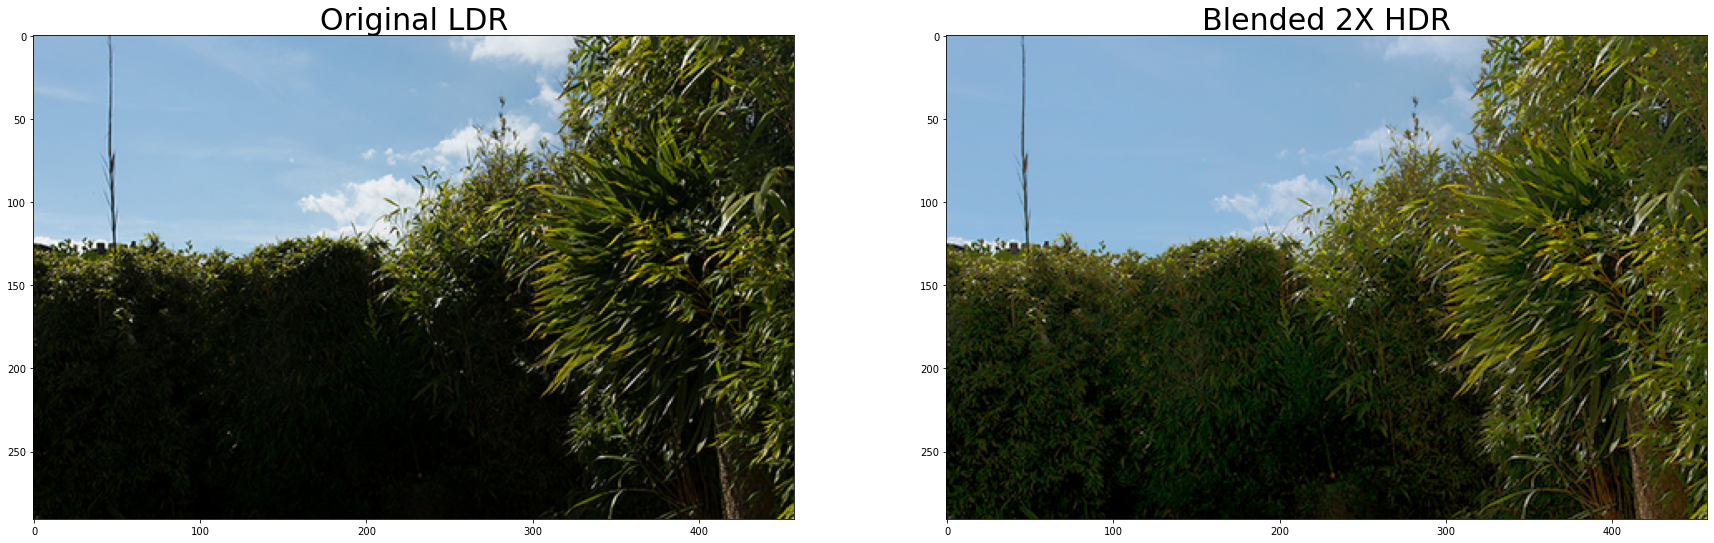

True

In [31]:
# Create the muliply and screen images
img1 = multiply(blended)
img2 = screen(blended)

# Blend images.
blended = blendImg(img, img1, img2)

# Show and save image
fig = plt.figure(figsize = (30,60))
columns = 2
rows = 1
fig.add_subplot(rows,columns, 1)
plt.imshow(img)
plt.title('Original LDR', fontdict={'fontsize': 30})
fig.add_subplot(rows,columns, 2)
plt.imshow(blended)
plt.title('Blended 2X HDR', fontdict={'fontsize': 30})
plt.show()

cv2.imwrite('test1.png', cv2.cvtColor(blended, cv2.COLOR_RGB2BGR))

##  *Notice the increased detail in the shadows of the bushes and the increased detail in the clouds. 

###  Following function is the whole image pipeline

In [32]:
def blendImg(img):

    # Save the width, height, and channel depth of the image. 
    h = img.shape[0]
    w = img.shape[1]
    d = img.shape[2]

    # Convert images to a float between 0 and 1.
    img = img.astype("float64") / 255
   
    
    # Create a variables for the blended image and set it to the original image. 
    imgBlend = img
    blendMult = img
    blendScreen = img

    # Apply the Mulitply blend.

    # For each pixel row in the image. 
    for y in range(0,h):
        # For each pixel in the row. x = pixel
        for x in range(0,w):
            # For each RGB value.
            for z in range(0,d):
                # Apply Screen blend 
                blendMult[y,x,z] = 1 - (1 - img[y,x,z]) * (1 - img[y,x,z])


    # Apply the Screen blend. 

    # For each pixel row in the image. 
    for y in range(0,h):
        # For each pixel in the row. x = pixel
        for x in range(0,w):
            # For each RGB value.
            for z in range(0,d):
                # Apply Screen blend 
                blendScreen[y,x,z] = 1 - (1 - img[y,x,z]) * (1 - img[y,x,z])

    # Blend the images. 
    
    # For each pixel row in the image. 
    for y in range(0,h):
        # For each pixel in the row. x = pixel
        for x in range(0,w):
            # For each RGB value.
            for z in range(0,d):

                # Preceived brightness 
                brightness = (img[y,x,0] * 0.2126) + (img[y,x,1] * 0.7152) + (img[y,x,2] * 0.0722)
                
                # Set a high and low cut off for the multiply (cuttOffHigh) and screen (cuttOffLow) images. 
                cutOffHigh = 2/3
                cutOffLow = 1/3
                
                if(brightness > cutOffHigh):

                    # Calculate an alpha mask so the blending fades out the closer you get to the midtone values.
                    alpha = np.interp(brightness,[cutOffHigh,1],[0,1])

                    # Blend the mulitplied image
                    imgBlend[y,x,z] = (img[y,x,z] * (1-alpha)) + (blendMult[y,x,z] * (alpha))
                if(brightness < cutOffLow):

                    # Calculate an alpha mask so the blending fades out the closer you get to the midtone values.
                    alpha = np.interp(brightness,[0,cutOffLow],[1,0])

                    #  Blend the screened image
                    imgBlend[y,x,z] = (img[y,x,z] * (1-alpha)) + (blendScreen[y,x,z] * (alpha))
                
    # Convert back to an integer between 0 and 255.
    imgBlend = imgBlend * 255
    imgBlend = np.uint8(imgBlend)

    # Return the blended image. 
    return imgBlend

Furture work:  Optimize and remove steps.  N^9 currently. Extrememly slow. 